In [1]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.cbook import flatten
%matplotlib inline 
os.chdir('/home/melissa/PROJECT_DIRECTORIES/ef1_alpha_analysis/scripts')
%run plotting.py

In [2]:
#load data for 1 recording and 2 recording
os.chdir('/home/melissa/EF1_alpha/debug')
rem_1_rec = pd.read_csv('R_1_rec.csv')
nrem_1_rec = pd.read_csv('N_1_rec.csv')
wake_1_rec = pd.read_csv('W_1_rec.csv')

os.chdir('/home/melissa/EF1_alpha/debug')
rem_2_rec = pd.read_csv('R_2_rec.csv')
nrem_2_rec = pd.read_csv('N_2_rec.csv')
wake_2_rec = pd.read_csv('W_2_rec.csv')

In [3]:
rem = pd.concat([rem_1_rec, rem_2_rec], axis = 0) 
nrem = pd.concat([nrem_1_rec, nrem_2_rec], axis = 0) 
wake = pd.concat([wake_1_rec, wake_2_rec], axis = 0) 
rem = rem.reset_index()
nrem = nrem.reset_index()
wake = wake.reset_index()
print(len(rem))
print(len(nrem))
print(len(wake))

340136
360144
380152


In [4]:
#deleting certain animals for medial hippocampus plots
rem_new = rem[(rem.Animal_ID != '191125A') & (rem.Animal_ID != '191126A')]
nrem_new = nrem[(nrem.Animal_ID != '191125A') & (nrem.Animal_ID != '191126A')]
wake_new = wake[(wake.Animal_ID != '191125A') & (wake.Animal_ID != '191126A')]
#nrem_new = nrem
#wake_new = wake
print(len(rem_new))
print(len(nrem_new))
print(len(wake_new))

310124
330132
340136


In [5]:
rem_new.reset_index()
nrem_new.reset_index()
wake_new.reset_index()

,level_0,index,Unnamed: 0,Animal_ID,Headstage,Channel,Brainstate,Power,Frequency,Genotype
0,0,0,0,191107A,A,2,W,1.159225e+01,0.0,WT
1,1,1,1,191107A,A,2,W,3.415198e+01,0.2,WT
2,2,2,2,191107A,A,2,W,9.806448e+01,0.4,WT
3,3,3,3,191107A,A,2,W,1.632454e+02,0.6,WT
4,4,4,4,191107A,A,2,W,2.274418e+02,0.8,WT
...,...,...,...,...,...,...,...,...,...,...
340131,380147,260099,260099,210705D,D,57,W,1.982190e-18,499.2,EF1
340132,380148,260100,260100,210705D,D,57,W,1.981420e-18,499.4,EF1
340133,380149,260101,260101,210705D,D,57,W,1.980869e-18,499.6,EF1
340134,380150,260102,260102,210705D,D,57,W,1.980538e-18,499.8,EF1


In [6]:
#MEDIAL HIPPOCAMPUS CHANNEL
channel_2_rem, channel_18_rem, channel_34_rem, channel_50_rem = separate_by_channel(rem_new, channel_number_list = [2, 18, 34, 50])
med_hip_rem = pd.concat([channel_2_rem, channel_18_rem, channel_34_rem, channel_50_rem], axis = 0)
channel_2_nrem, channel_18_nrem, channel_34_nrem, channel_50_nrem = separate_by_channel(nrem_new, channel_number_list = [2, 18, 34, 50])
med_hip_nrem = pd.concat([channel_2_nrem, channel_18_nrem, channel_34_nrem, channel_50_nrem], axis = 0)
channel_2_wake, channel_18_wake, channel_34_wake, channel_50_wake = separate_by_channel(wake_new, channel_number_list = [2, 18, 34, 50])
med_hip_wake = pd.concat([channel_2_wake, channel_18_wake, channel_34_wake, channel_50_wake], axis = 0)

In [7]:
#MOTOR CORTEX
channel_20_rem, channel_3_rem, channel_19_rem, channel_35_rem, channel_51_rem = separate_by_channel(rem, channel_number_list = [3, 19, 20, 35, 21])
motor_rem = pd.concat([channel_20_rem, channel_3_rem, channel_19_rem, channel_35_rem, channel_51_rem], axis = 0)
channel_20_nrem, channel_3_nrem, channel_19_nrem, channel_35_nrem, channel_51_nrem = separate_by_channel(nrem, channel_number_list = [3, 19, 20, 35, 21])
motor_nrem = pd.concat([channel_20_nrem, channel_3_nrem, channel_19_nrem, channel_35_nrem, channel_51_nrem], axis = 0)
channel_20_wake, channel_3_wake, channel_19_wake, channel_35_wake, channel_51_wake = separate_by_channel(wake, channel_number_list = [3, 19, 20, 35, 21])
motor_wake = pd.concat([channel_20_wake, channel_3_wake, channel_19_wake, channel_35_wake, channel_51_wake], axis = 0)

In [8]:
#SOMATOSENSORY
channel_7_rem, channel_23_rem, channel_39_rem, channel_55_rem = separate_by_channel(rem, channel_number_list = [7, 23, 39, 55])
somato_rem = pd.concat([channel_7_rem, channel_23_rem, channel_39_rem, channel_55_rem], axis = 0)
channel_7_nrem, channel_23_nrem, channel_39_nrem, channel_55_nrem = separate_by_channel(nrem, channel_number_list = [7, 23, 39, 55])
somato_nrem = pd.concat([channel_7_nrem, channel_23_nrem, channel_39_nrem, channel_55_nrem], axis = 0)
channel_7_wake, channel_23_wake, channel_39_wake, channel_55_wake = separate_by_channel(wake, channel_number_list = [7, 23, 39, 55])
somato_wake = pd.concat([channel_7_wake, channel_23_wake, channel_39_wake, channel_55_wake], axis = 0)

In [10]:
#PARIETAL CORTEX
channel_8_rem, channel_9_rem, channel_25_rem, channel_41_rem, channel_57_rem = separate_by_channel(rem, channel_number_list = [8, 9, 25, 41, 57])
parietal_rem = pd.concat([channel_8_rem, channel_9_rem, channel_25_rem, channel_41_rem, channel_57_rem], axis = 0)
channel_8_nrem, channel_9_nrem, channel_25_nrem, channel_41_nrem, channel_57_nrem = separate_by_channel(nrem, channel_number_list = [8, 9, 25, 41, 57])
parietal_nrem = pd.concat([channel_8_nrem, channel_9_nrem, channel_25_nrem, channel_41_nrem, channel_57_nrem], axis = 0)
channel_8_wake, channel_9_wake, channel_25_wake, channel_41_wake, channel_57_wake = separate_by_channel(wake, channel_number_list = [8, 9, 25, 41, 57])
parietal_wake = pd.concat([channel_8_wake, channel_9_wake, channel_25_wake, channel_41_wake, channel_57_wake], axis = 0)

In [11]:
os.chdir('/home/melissa/PROJECT_DIRECTORIES/ef1_alpha_analysis/scripts')
%run ef1_alpha_properties.py
%run plotting.py 

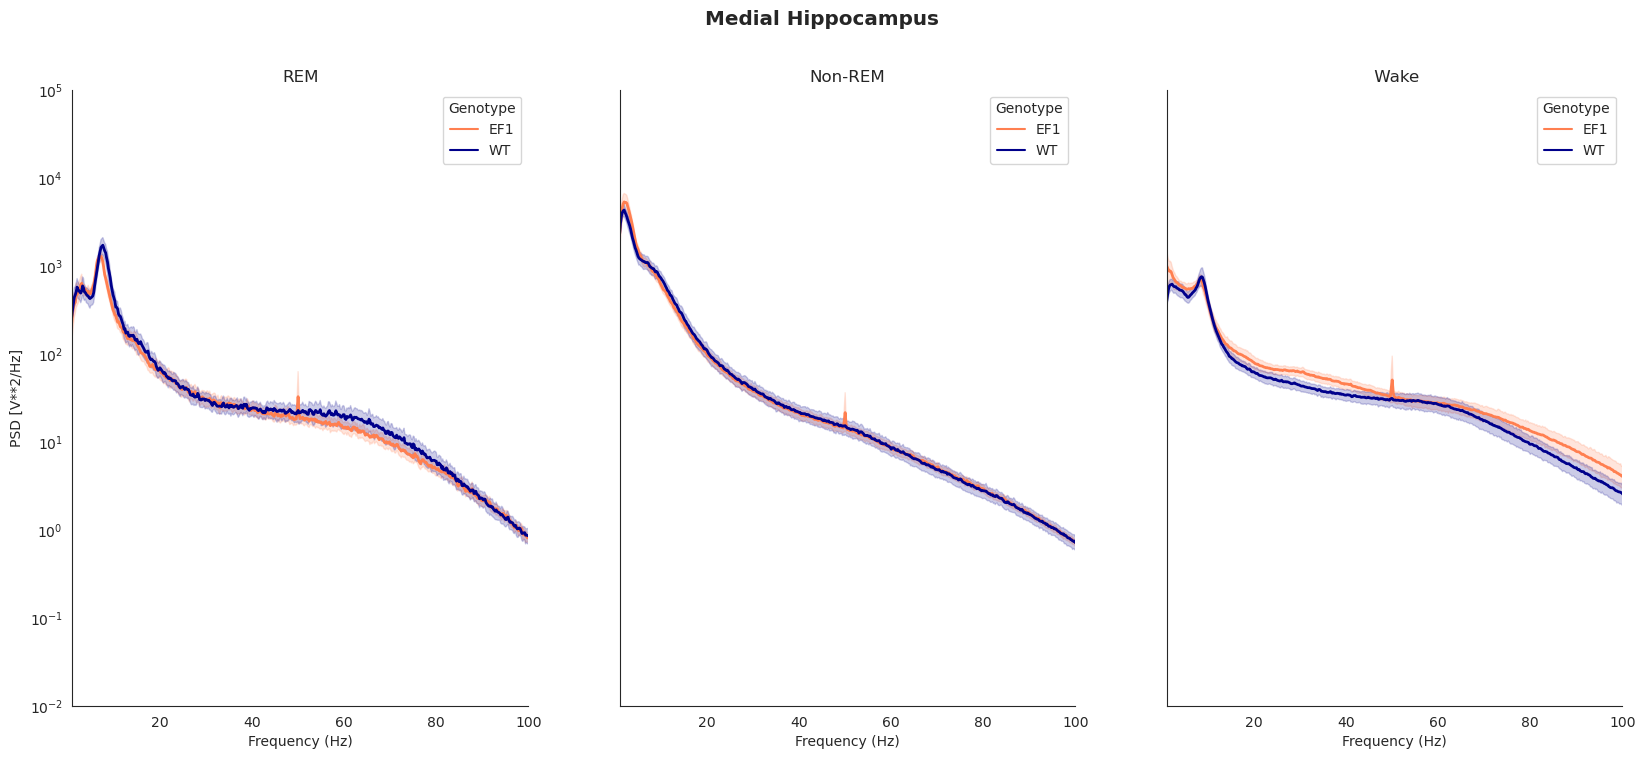

In [12]:
plot_geno_average_by_channel(channel_group = 'Medial Hippocampus', color_list = ['coral', 'darkblue'], 
                                                hue_order_list = ['EF1', 'WT'], 
                                                data_rem = med_hip_rem, 
                                                data_nrem = med_hip_nrem, 
                                                data_wake = med_hip_wake, 
                                                ylim_lower = 10**-2, ylim_upper = 10**5,  save_path = '/home/melissa/RESULTS/EF1_alpha_seizure_power/SVG/medial_hippocampus')

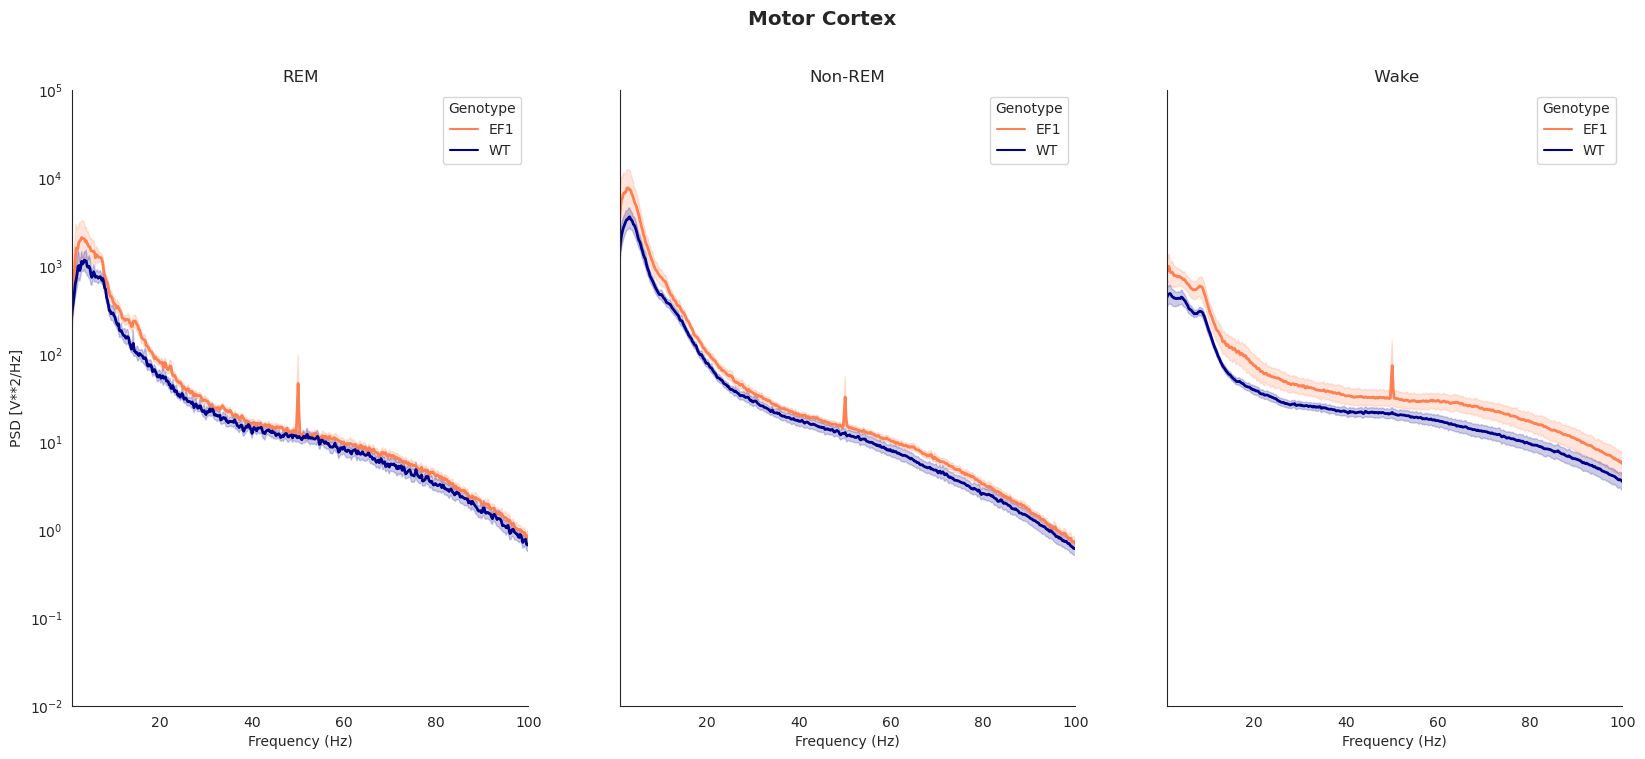

In [13]:
plot_geno_average_by_channel(channel_group = 'Motor Cortex', color_list = ['coral', 'darkblue'], 
                                                hue_order_list = ['EF1', 'WT'], 
                                                data_rem = motor_rem, 
                                                data_nrem = motor_nrem, 
                                                data_wake = motor_wake, 
                                                ylim_lower = 10**-2, 
                                                ylim_upper= 10**5, save_path = '/home/melissa/RESULTS/EF1_alpha_seizure_power/SVG/motor_cortex/')

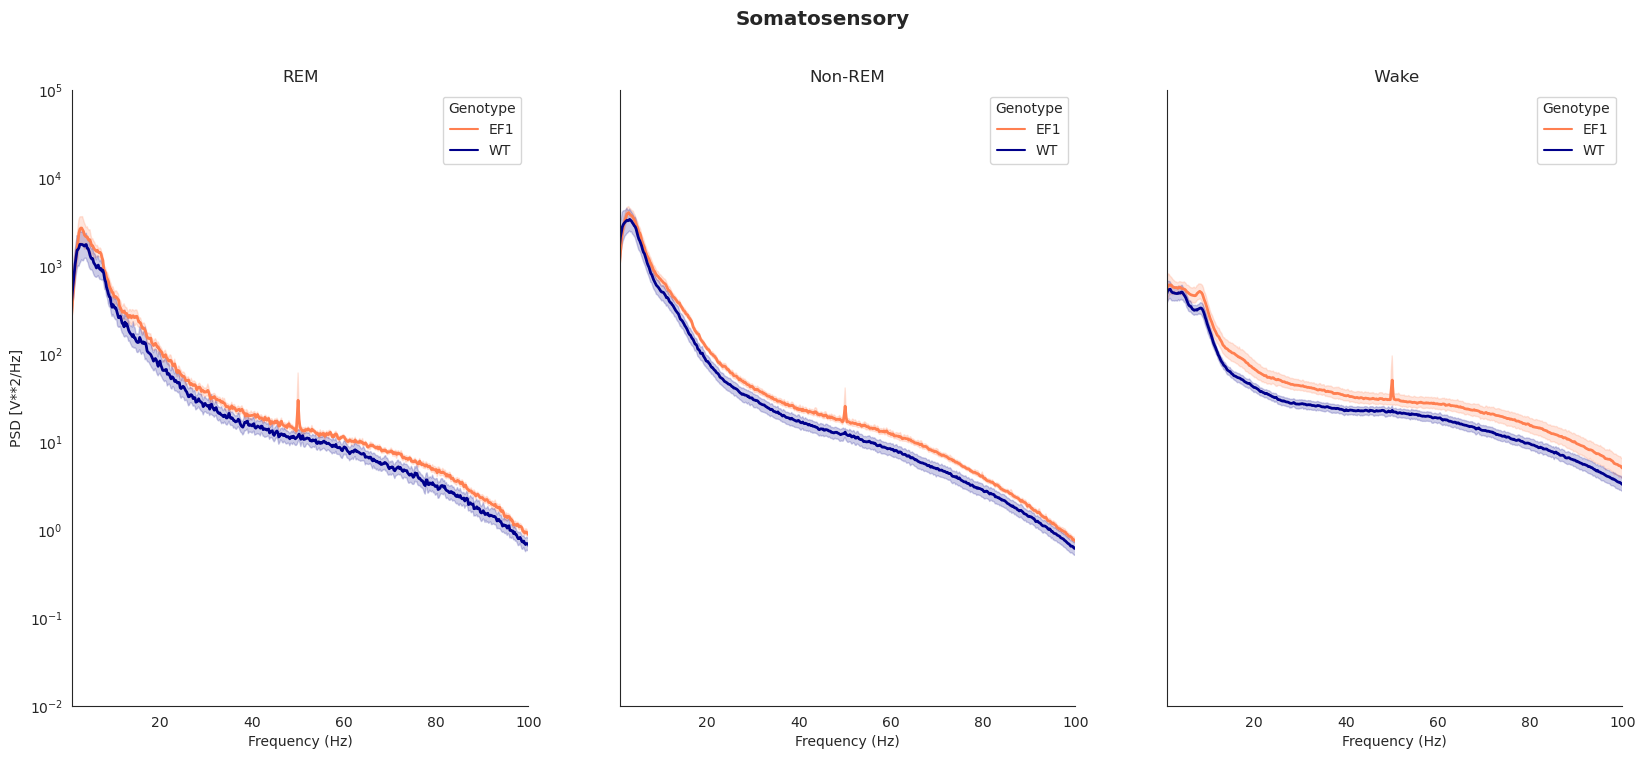

In [14]:
plot_geno_average_by_channel(channel_group = 'Somatosensory', color_list = ['coral', 'darkblue'], 
                                                hue_order_list = ['EF1', 'WT'], 
                                                data_rem = somato_rem, 
                                                data_nrem = somato_nrem, 
                                                data_wake = somato_wake, 
                                                ylim_lower = 10**-2, 
                                                ylim_upper= 10**5, save_path = '/home/melissa/RESULTS/EF1_alpha_seizure_power/SVG/somatosensory' )

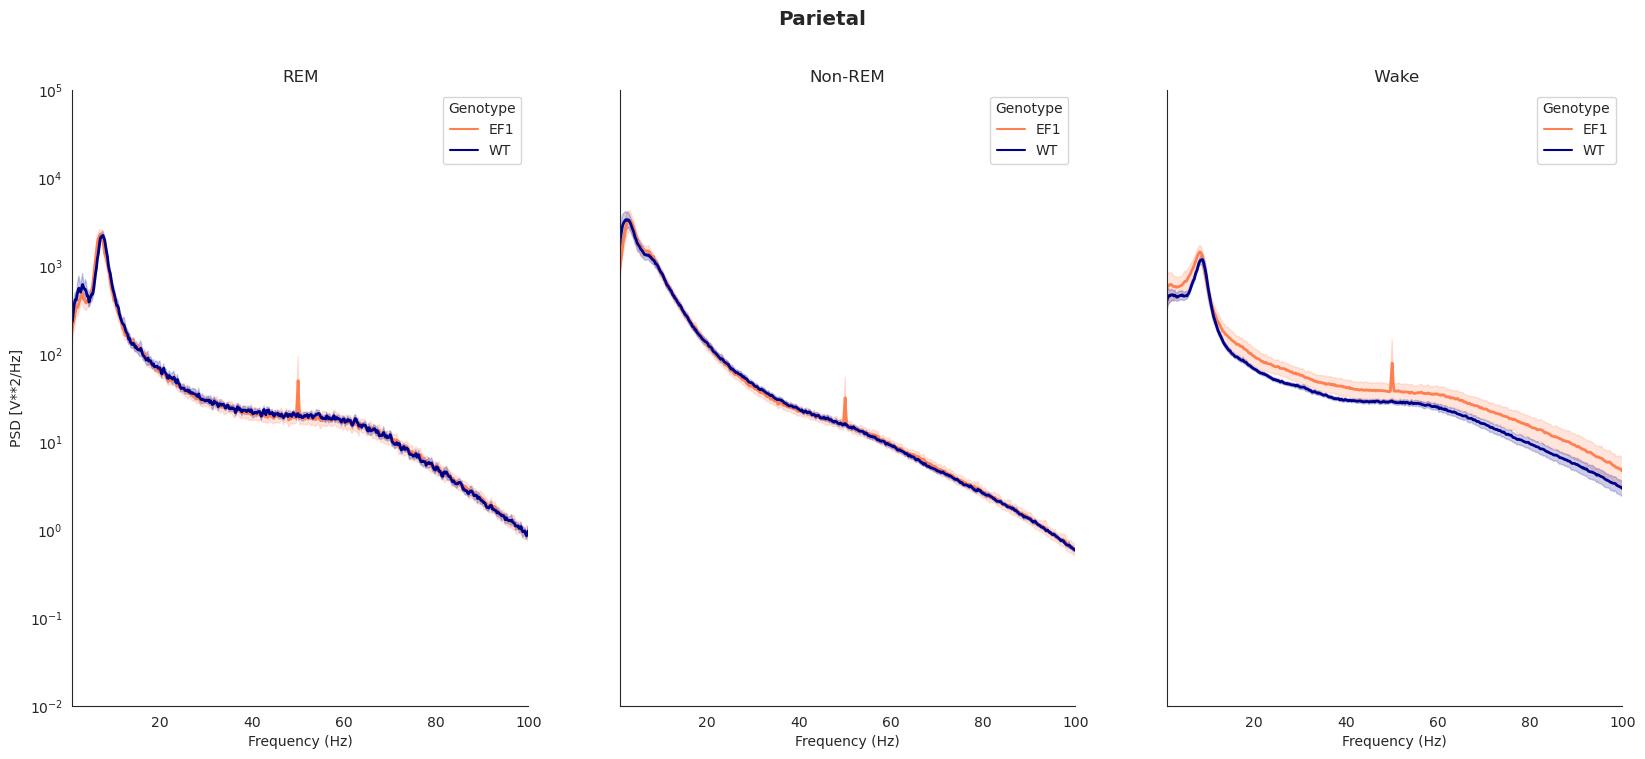

In [15]:
plot_geno_average_by_channel(channel_group = 'Parietal', color_list = ['coral', 'darkblue'], 
                                                hue_order_list = ['EF1', 'WT'], 
                                                data_rem = parietal_rem, 
                                                data_nrem = parietal_nrem, 
                                                data_wake = parietal_wake, 
                                                ylim_lower = 10**-2, 
                                                ylim_upper= 10**5, save_path = '/home/melissa/RESULTS/EF1_alpha_seizure_power/SVG/parietal')